# INTRODUCTION
1. [Data Analysis](#1)
2. [Bar Plot](#2)
    * [Poverty Rate of each state with visualization](#2)
    * [Most common 15 name and surname of killed people](#3)
    * [Percentage of state population according to the race](#4)
3. [Point Plot](#5)
4. [Joint Plot](#6)
5. [Pie Chart](#7)
6. [Lm Plot](#8)
7. [Kde Plot](#9)
8. [Heatmap](#10)
9. [Boxplot](#11)
10. [Swarm Plot](#12)
11. [Pair Plot](#13)
12. [Count Plot](#14)

In [1]:
# This Papiython 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fatal-police-shootings-in-the-us

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


<a id=1> </a> <br>
### 1. Data Analysis

In [2]:
#please add "encoding="windows-1252" end of the read code.
df_pp = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
df_pp.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [3]:
df_pk = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding="windows-1252")
df_pk.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df_mh = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv", encoding="windows-1252")
df_mh.head()


,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [5]:
df_po25 =  pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
df_po25.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [6]:
df_scity =  pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv", encoding="windows-1252")
df_scity.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


<a id=2></a> <br>
## 2- Bar Plot
### Poverty Rate of each state with visualization

In [7]:
#Powerty rate of each state:
df_pp.info() #there is no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
df_pp.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

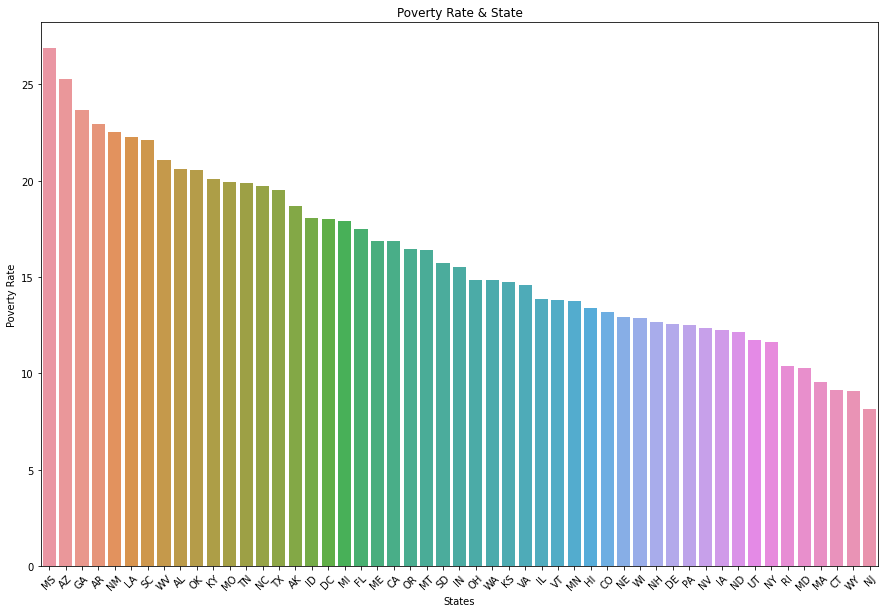

In [9]:
#change poverty rate type object to float
df_pp.poverty_rate.replace(["-"], 0.0, inplace=True)
df_pp.poverty_rate = df_pp.poverty_rate.astype(float)
area_list = list(df_pp["Geographic Area"].unique())
area_poverty_ratio=[]
for i in area_list:
    a = df_pp[df_pp["Geographic Area"]==i]
    area_poverty_rate = sum(a.poverty_rate)/len(a)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({"area_list":area_list, "area_poverty_ratio": area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
ax = sns.barplot(x=sorted_data["area_list"], y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate & State")
plt.show()


    

<a id=3> </a><br>
### Most common 15 name and surname of killed people

In [10]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [11]:
df_pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


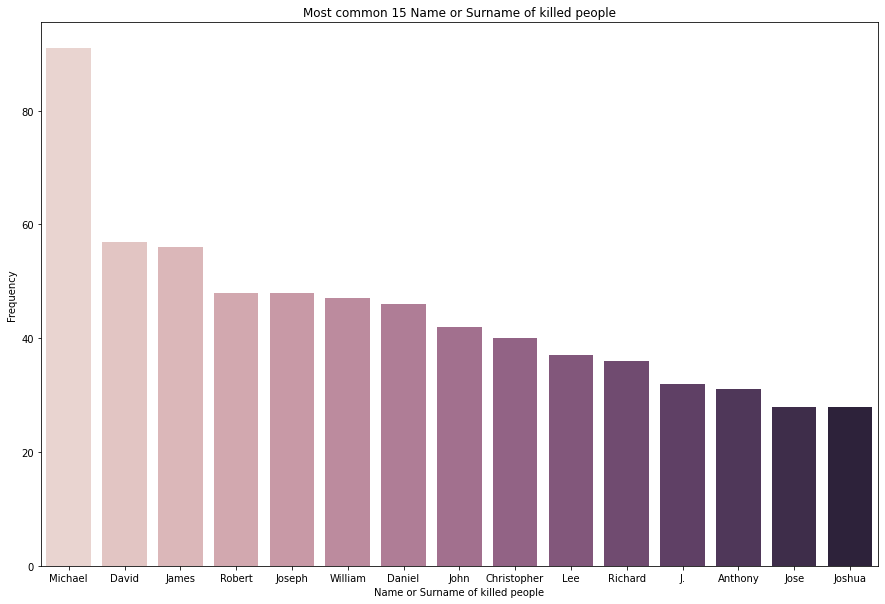

In [12]:
seperate = df_pk.name[df_pk.name!="TK TK"].str.split() #there is a name with TK TK. We ignore this one.
n, s = zip(*seperate)
name_list = n+s
new_count = Counter(name_list)
common_names = new_count.most_common(15)
a,b = zip(*common_names)
a,b = list(a), list(b)
plt.figure(figsize=(15,10))
ax = sns.barplot(x=a, y=b, palette = sns.cubehelix_palette(len(a)))
plt.xlabel("Name or Surname of killed people")
plt.ylabel("Frequency")
plt.title("Most common 15 Name or Surname of killed people")
plt.show()

<a id =4> </a><br>
### Percentage of state population according to the race 
(horizontal bar plot)

In [13]:
df_scity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [14]:
df_scity.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [15]:
df_scity.share_native_american.value_counts()

0       6930
0.2     3170
0.3     2612
0.1     2522
0.4     2004
        ... 
74.4       1
40.8       1
52.2       1
75.7       1
56.6       1
Name: share_native_american, Length: 628, dtype: int64

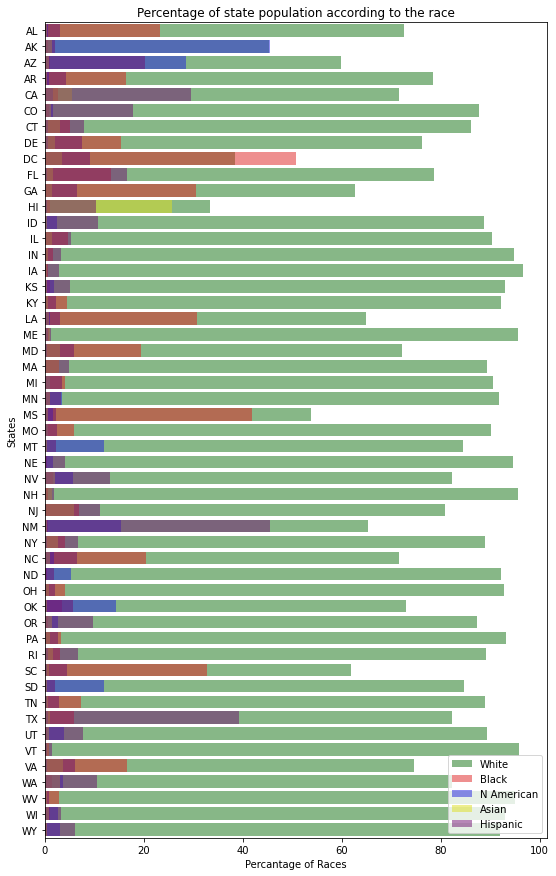

In [16]:
df_scity.replace(["-"],0.0, inplace=True)
df_scity.replace(["(X)"],0.0, inplace=True)
#turn object data to float
df_scity.loc[:, ["share_white","share_black","share_native_american","share_asian","share_hispanic"]]= df_scity.loc[:, ["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)
area_list = list(df_scity["Geographic area"].unique())
s_white=[]
s_black=[]
s_namerican=[]
s_asian=[]
s_hispanic=[]
for i in area_list:
    x = df_scity[df_scity["Geographic area"]==i]
    s_white.append(sum(x.share_white)/len(x))
    s_black.append(sum(x.share_black)/len(x))
    s_namerican.append(sum(x.share_native_american)/len(x))
    s_asian.append(sum(x.share_asian)/len(x))
    s_hispanic.append(sum(x.share_hispanic)/len(x))
    
f, ax = plt.subplots(figsize=(9,15))
sns.barplot(x=s_white, y=area_list, color="green", alpha=0.5, label="White")
sns.barplot(x=s_black, y=area_list, color="red", alpha=0.5, label="Black")
sns.barplot(x=s_namerican, y=area_list, color="blue", alpha=0.5, label="N American")
sns.barplot(x=s_asian, y=area_list, color="yellow", alpha=0.5, label="Asian")
sns.barplot(x=s_hispanic, y=area_list, color="purple", alpha=0.5, label="Hispanic")

ax.legend(loc="lower right", frameon=True)
ax.set(xlabel="Percantage of Races", ylabel="States", title="Percentage of state population according to the race")
plt.show()

<a id=5> </a><br>
## 3-Point Plot
### High school graduation rate & poverty rate of each state

In [17]:
#poverty rate of each state
df_pp.poverty_rate.replace(["-"], 0.0, inplace=True)
df_pp.poverty_rate = df_pp.poverty_rate.astype(float)
area_list = list(df_pp["Geographic Area"].unique())
area_poverty_ratio=[]
for i in area_list:
    a = df_pp[df_pp["Geographic Area"]==i]
    area_poverty_rate = sum(a.poverty_rate)/len(a)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({"area_list":area_list, "area_poverty_ratio": area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)



In [18]:
# High school graduation rate of the population that is older than 25 in states
df_po25.percent_completed_hs.replace(['-'],0.0,inplace = True)
df_po25.percent_completed_hs = df_po25.percent_completed_hs.astype(float)
area_list = list(df_po25['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = df_po25[df_po25['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [19]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [20]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


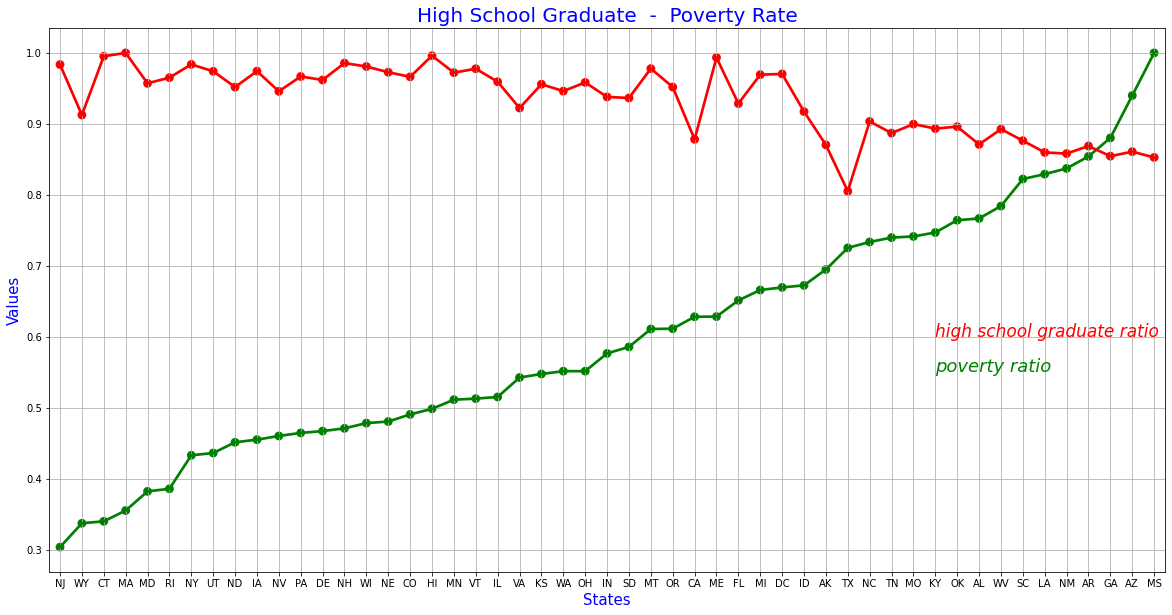

In [21]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio']) #normalize according to max number
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio']) #normalize according to max number
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

#visualize

f, ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x="area_list", y="area_poverty_ratio", data=data, color="green", alpha=0.8)
sns.pointplot(x="area_list", y="area_highschool_ratio", data=data, color="red", alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='green',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  -  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

<a id=6> </a> <br>
## 4. Joint Plot
### High school graduation rate & poverty rate of each state

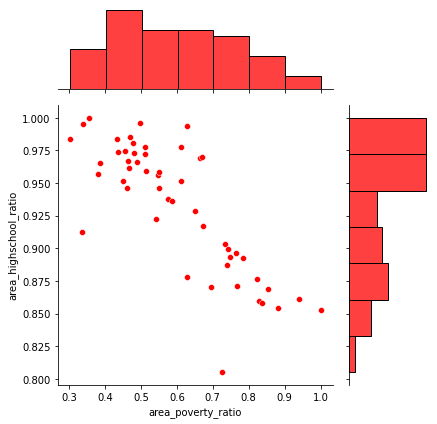

In [22]:
graph = sns.jointplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data, ratio=3, color="r" )

<a id=7> </a><br>
## 5. Pie Chart
### Race Rate according to Poverty Ratio

In [23]:
#sum of null data in race column
df_pk.race.isnull().sum()

195

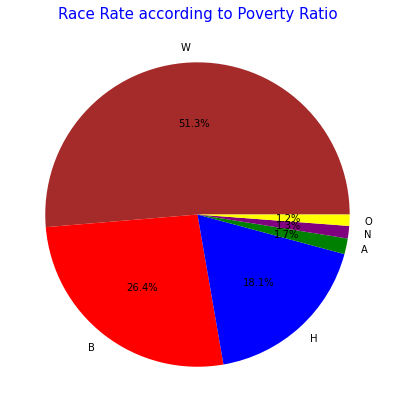

In [24]:
df_pk.race.dropna(inplace=True)
labels = df_pk.race.value_counts().index #6 various races in data
colors = ["brown", "red", "blue", "green", "purple", "yellow"]
pie_rate = [0,0,0,0,0,0]
values = df_pk.race.value_counts().values
plt.figure(figsize=(7,7))
#matplotlib pie chart of visualization
plt.pie(values, explode=pie_rate, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Race Rate according to Poverty Ratio", color="blue", fontsize=15)
plt.show()

<a id = 8> </a> <br>
## 6- Lm Plot
### High school graduation rate & poverty rate of each state

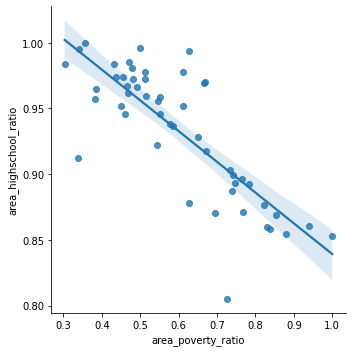

In [25]:
sns.lmplot(x= "area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

<a id = 9> </a> <br>
## 7- Kde Plot
### High school graduation rate & poverty rate of each state

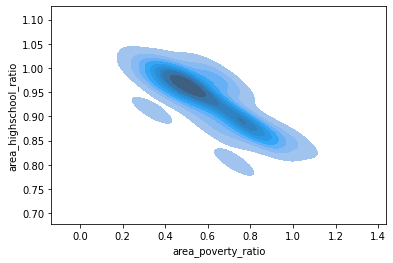

In [26]:
sns.kdeplot(x= "area_poverty_ratio", y="area_highschool_ratio", data=data, shade=True, cut=5)
plt.show()

<a id = 10> </a> <br>
## 8- Heatmap (for Correlation)
### High school graduation rate & poverty rate of each state

In [27]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


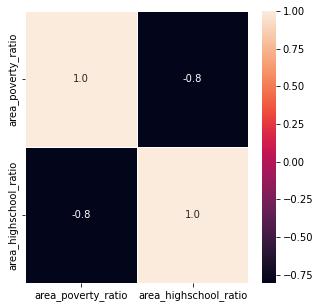

In [28]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.show()

<a id = 11> </a> <br>
## 9- BoxPlot
### Manner of death (shot, shot&Tasered)

In [29]:
df_pk.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

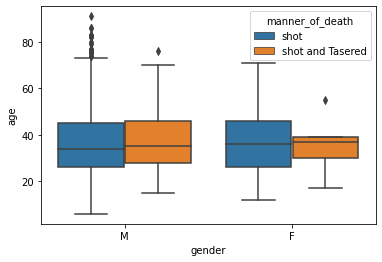

In [30]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df_pk)
plt.show()

<a id = 12> </a> <br>
## 10- Swarm Plot
### Manner of death (shot, shot&Tasered)

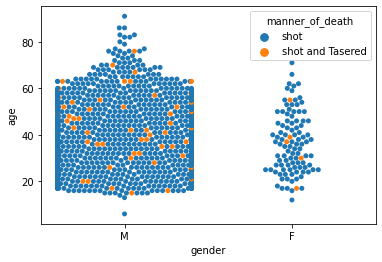

In [31]:
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=df_pk)
plt.show()

<a id = 13> </a> <br>
## 11- Pair Plot
### High school graduation rate & poverty rate of each state

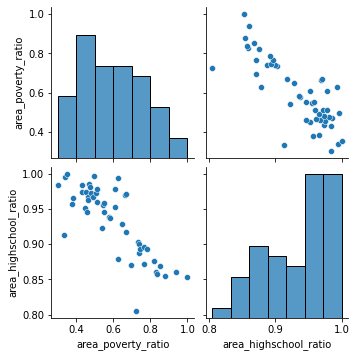

In [32]:
sns.pairplot(data)
plt.show()

<a id = 14> </a> <br>
## 12- Count Plot
### High school graduation rate & poverty rate of each state

In [33]:
df_pk.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

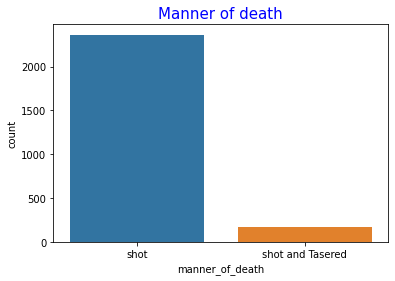

In [34]:
#sns.countplot(df_pk.gender)
sns.countplot(df_pk.manner_of_death)
plt.title("Manner of death", color="blue", fontsize=15)
plt.show()

### Number of weapon & Types

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64


Text(0.5, 1.0, 'Kill weapon')

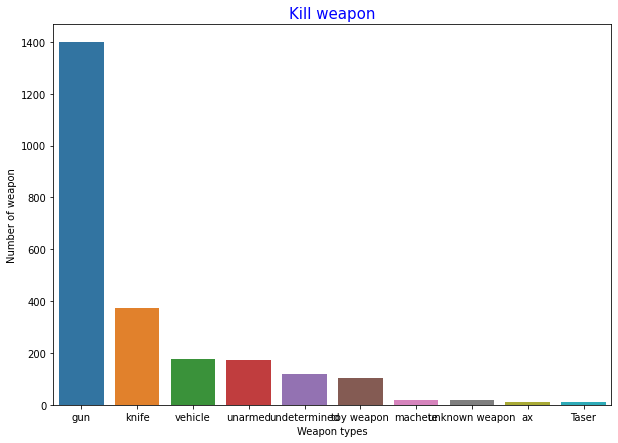

In [35]:
armed = df_pk.armed.value_counts()
print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:10].index, y=armed[:10].values)
plt.ylabel("Number of weapon")
plt.xlabel("Weapon types")
plt.title("Kill weapon", color="blue", fontsize=15)

### Most killed cities

Los Angeles         39
Phoenix             31
Houston             27
Chicago             25
Las Vegas           21
                    ..
Columbia Heights     1
Ozark                1
Lampe                1
Seagoville           1
Oshkosh              1
Name: city, Length: 1417, dtype: int64


Text(0.5, 1.0, 'Most killed cities')

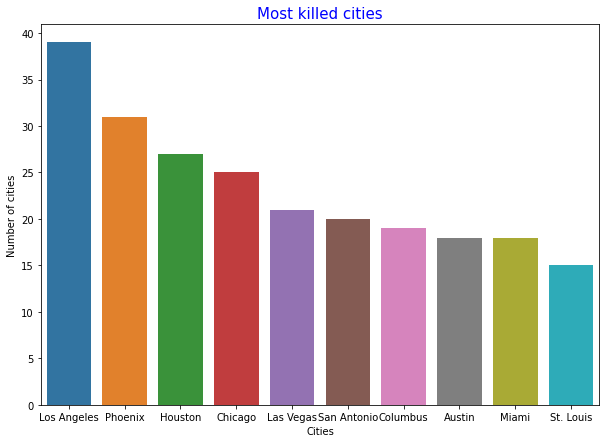

In [36]:
cities = df_pk.city.value_counts()
print(cities)
plt.figure(figsize=(10,7))
sns.barplot(x=cities[:10].index, y=cities[:10].values)
plt.ylabel("Number of cities")
plt.xlabel("Cities")
plt.title("Most killed cities", color="blue", fontsize=15)